# Breaking Bad Analysis Project


**Breaking Bad** is a critically acclaimed American TV series created by *Vince Gilligan*, airing from 2008 to 2013. It follows *Walter White*, a high school chemistry teacher who turns to cooking methamphetamine after being diagnosed with terminal cancer.  

The series explores themes of morality, ambition, and the consequences of one's choices, earning numerous awards and recognition as one of the greatest television shows of all time.

**About the project**  

This project looks at IMDb ratings for every episode of *Breaking Bad*. It covers each season and the entire series with the following features:

- **Detailed Reports:** 
  - Information on the best and worst episodes in each season.
  
- **Visualizations:** 
  - Charts showing how ratings change across episodes and seasons.

- **Statistics:** 
  - Computation of average ratings for each season and an overall average rating for the entire series, providing a clear picture of its reception.
- **Sentiment Analysis:**
  - We’ll analyze episode summaries to see how the feelings expressed in them relate to viewer ratings.

The goal is to understand how well *Breaking Bad* was received by viewers.

**Dataset Source**

The dataset used for this analysis was found in a Kaggle discussion thread. You can access the discussion and dataset details [Breaking Bad Dataset](https://www.kaggle.com/discussions/general/252119).

**Color Palette Reference**

The color palette used in this project is inspired by the Breaking Bad series. The color information was sourced from [Breaking Bad Color Palette](https://www.schemecolor.com/breaking-bad-color-palette.php).


## Overall Analysis 

*This section includes data cleansing - loading the dataset/filling the null values and the deep analysis of Breaking Bad series*

In [338]:
import pandas as pd
df=pd.read_csv('breaking_bad.csv', encoding='ISO-8859-1')
df.isnull().sum()

Date                    0
Season                  0
Episode                 0
Title                   0
Directed by             0
Written by              0
Duration_mins           0
Summary                 0
Rating_IMDB             0
U.S. viewers_million    5
dtype: int64

In [339]:
df['U.S. viewers_million'] = df['U.S. viewers_million'].fillna(df['U.S. viewers_million'].median())

### Correlation Matrix 

The correlation matrix shows how different features in the "Breaking Bad" dataset relate to each other. 

**Understanding Correlation Coefficients**
- **Range**: Values range from -1 to 1.
  - **1** means a strong positive relationship (both numbers go up together).
  - **-1** means a strong negative relationship (one number goes up while the other goes down).
  - **0** means no relationship (the numbers don’t affect each wership or ratings.

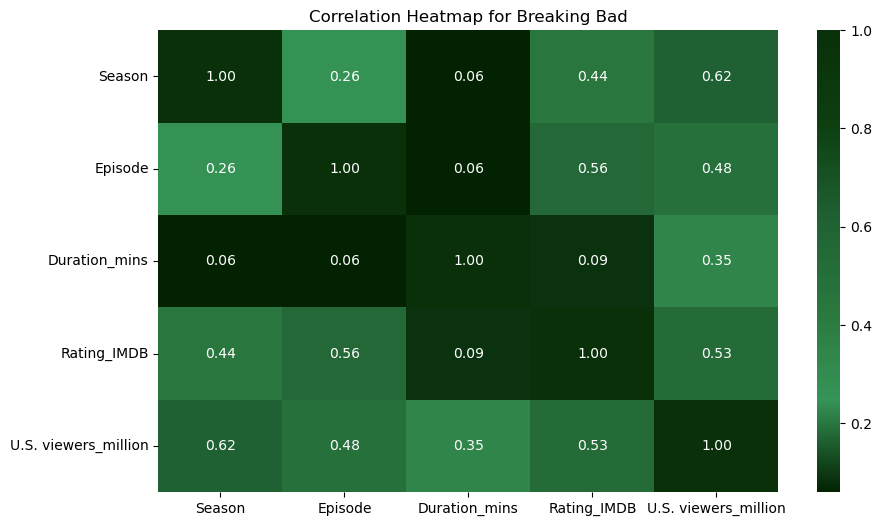

                        Season   Episode  Duration_mins  Rating_IMDB  \
Season                1.000000  0.263719       0.061618     0.435525   
Episode               0.263719  1.000000       0.059981     0.555829   
Duration_mins         0.061618  0.059981       1.000000     0.088966   
Rating_IMDB           0.435525  0.555829       0.088966     1.000000   
U.S. viewers_million  0.617541  0.482387       0.349597     0.532799   

                      U.S. viewers_million  
Season                            0.617541  
Episode                           0.482387  
Duration_mins                     0.349597  
Rating_IMDB                       0.532799  
U.S. viewers_million              1.000000  


In [341]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
numeric_df = df.select_dtypes(include=['float64', 'int64'])

breaking_bad_colors = breaking_bad_hex_colors = [
    '#032202',  # Smoky Black
    "#369457",  # Sea Green
    "#29773E",  # Japanese Laurel
    "#1F6032",  # Mughal Green
    "#0D3E10",  # Traditional Forest Green
    "#093009"   # Dark Green
]

cmap = mcolors.LinearSegmentedColormap.from_list('breaking_bad', breaking_bad_colors)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=cmap)
plt.title('Correlation Heatmap for Breaking Bad')
plt.show()

print(correlation_matrix)



**Key Relationships**
- **Season and U.S. Viewers (0.62)** - As the season number goes up, more people tend to watch.
- **IMDb Rating and Episode (0.56)** - Later episodes tend to have better ratings.
- **IMDb Rating and U.S. Viewers (0.53)** - Higher ratings are linked with more viewers.
- **Episode and U.S. Viewers (0.48)** - Later episodes usually attract more viewers.
- **IMDb Rating and Season (0.44)** - Seasons with higher numbers often have better ratings.
- **Duration of Episodes** - This feature has little correlation to viewers or ratings, which means that the length of an episode doesn't really affect how many people watch it or how well it's rated.

**Summary**  
Overall, it looks like as the series progresses through seasons and episodes, both viewer numbers and IMDb ratings tend to improve. Duration of the episodes doesn't seem to matter much for ratings.


### Sentiment Analysis of Each Episodes

In this analysis, we used the **VADER** to evaluate the sentiment of episode summaries from the TV series "Breaking Bad." The goal was to understand how the tone of each episode relates to viewer ratings.

**What is VADER?**

**VADER** (*Valence Aware Dictionary and sEntiment Reasoner*) sentiment analysis tool designed to analyze text and determine its emotional tone.

**Steps Involved**

- **Sentiment Scoring**: 
   - Each episode's summary was analyzed to calculate four sentiment scores:
     - **Negative Sentiment**: How negative the summary is.
     - **Neutral Sentiment**: How neutral the summary is.
     - **Positive Sentiment**: How positive the summary is.
     - **Compound Score**: A single score that summarizes the overall sentiment, ranging from -1 (very negative) to +1 (very positive).

- **Highlighting Extreme Sentiments**:
   - Episodes with a compound score above **0.5** are classified as **highly positive**, while those with a score below **-0.5** are marked as **highly negative.** This helps in identifying episodes that strongly resonate or clash with viewers' feelings.
  
**Visualization of Sentiment Progression**

We created a line plot to show how sentiment changes across episodes, highlighting:
- **High Positive Episodes** (marked in yellow)
- **High Negative Episodes** (marked in brown)


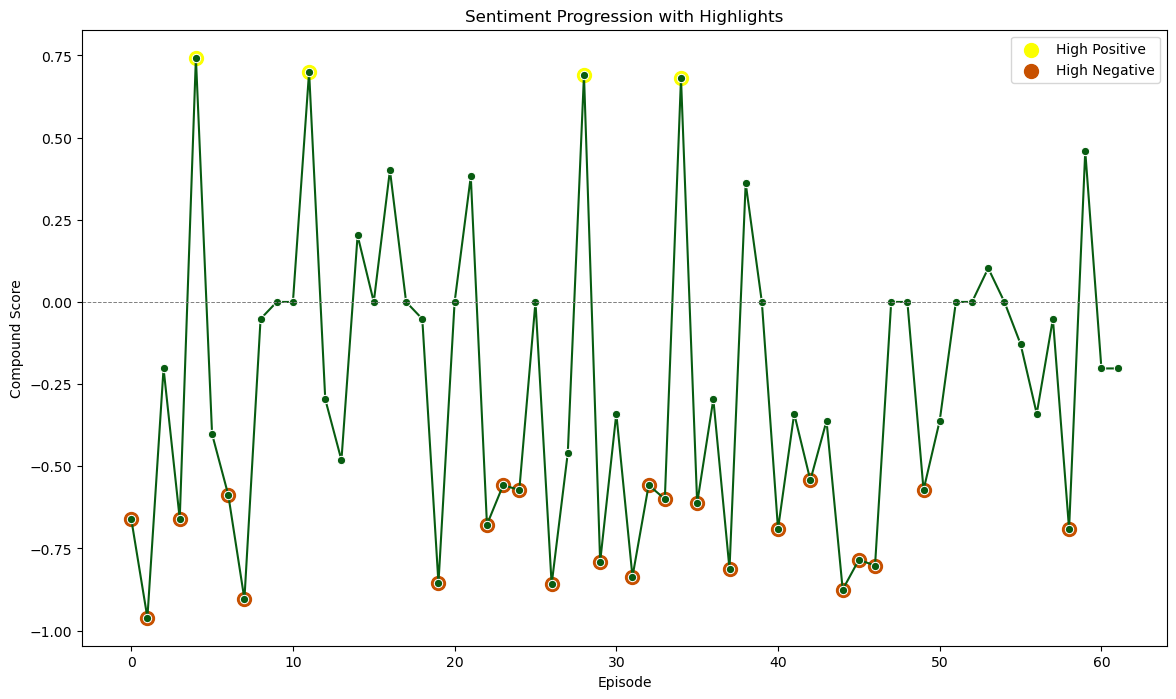

In [344]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment(summary):
    return sid.polarity_scores(summary)

# Apply the function to the Summary column
df['Sentiment'] = df['Summary'].apply(get_sentiment)

# Extract sentiment components
df['Sentiment_Neg'] = df['Sentiment'].apply(lambda x: x['neg'])
df['Sentiment_Neu'] = df['Sentiment'].apply(lambda x: x['neu'])
df['Sentiment_Pos'] = df['Sentiment'].apply(lambda x: x['pos'])
df['Sentiment_Compound'] = df['Sentiment'].apply(lambda x: x['compound'])

extreme_positive = df[df['Sentiment_Compound'] > 0.5]
extreme_negative = df[df['Sentiment_Compound'] < -0.5]

# Graph the result
plt.figure(figsize=(14, 8))
sns.lineplot(x=df.index, y='Sentiment_Compound', data=df, marker="o", color="#085c11")
plt.scatter(extreme_positive.index, extreme_positive['Sentiment_Compound'], color="#fbff00", label="High Positive", s=100)
plt.scatter(extreme_negative.index, extreme_negative['Sentiment_Compound'], color="#c75000", label="High Negative", s=100)
plt.title("Sentiment Progression with Highlights")
plt.xlabel("Episode")
plt.ylabel("Compound Score")
plt.axhline(0, color="gray", linestyle="--", linewidth=0.7)
plt.legend()
plt.show()


identifying the episodes with the highest positive and negative sentiment scores.

In [346]:
# Episode with the highest positive sentiment
most_positive_episode = df.loc[df['Sentiment_Compound'].idxmax()]

# Episode with the highest negative sentiment
most_negative_episode = df.loc[df['Sentiment_Compound'].idxmin()]

print("Most Positive Episode:")
print("-" * 50)
print(f"Title: {most_positive_episode['Title']}\nIMDb Rating: {most_positive_episode['Rating_IMDB']}\nSentiment Score: {most_positive_episode['Sentiment_Compound']}\nSummary:\n{most_positive_episode['Summary']}")

print("\nMost Negative Episode:")
print("-" * 50)
print(f"Title: {most_negative_episode['Title']}\nIMDb Rating: {most_negative_episode['Rating_IMDB']}\nSentiment Score: {most_negative_episode['Sentiment_Compound']}\nSummary:\n{most_negative_episode['Summary']}")



Most Positive Episode:
--------------------------------------------------
Title: Gray Matter
IMDb Rating: 8.4
Sentiment Score: 0.743
Summary:
Walt rejects everyone who tries to help him with the cancer. Jesse tries his best to create Walt's meth, with the help of an old friend.

Most Negative Episode:
--------------------------------------------------
Title: Cat's in the Bag...
IMDb Rating: 8.7
Sentiment Score: -0.9607
Summary:
After their first drug deal goes terribly wrong, Walt and Jesse are forced to deal with a corpse and a prisoner. Meanwhile, Skyler grows suspicious of Walt's activities.


## Summary Statistics for Sentiment Scores
Now, let's calculate summary statistics for the sentiment scores across all episodes.


In [348]:
print("Summary Statistics for Sentiment Scores:")
print(df[['Sentiment_Neg', 'Sentiment_Neu', 'Sentiment_Pos', 'Sentiment_Compound']].describe())

Summary Statistics for Sentiment Scores:
       Sentiment_Neg  Sentiment_Neu  Sentiment_Pos  Sentiment_Compound
count      62.000000      62.000000      62.000000           62.000000
mean        0.122065       0.827903       0.050000           -0.262945
std         0.110583       0.129990       0.078782            0.445012
min         0.000000       0.458000       0.000000           -0.960700
25%         0.000000       0.755500       0.000000           -0.609150
50%         0.115000       0.824500       0.000000           -0.318000
75%         0.189750       0.914000       0.081500            0.000000
max         0.492000       1.000000       0.359000            0.743000


**Average Scores**
- **Negative Sentiment**: The average score for negative sentiment is about **0.12**, which means that most episodes do not express strong negative feelings.
- **Neutral Sentiment**: The average score for neutral sentiment is **0.83**, showing that many episodes are mostly neutral, without strong emotions.
- **Positive Sentiment**: The average score for positive sentiment is very low at **0.05**, indicating that there are very few episodes with strong positive feelings.
- **Overall Sentiment**: The average compound sentiment score is **-0.26**, suggesting that, on the whole, the series has a slight negative tone.

**Range of Scores**
- The lowest negative sentiment score is **0.00**, meaning some episodes have no negative feelings at all. The highest negative sentiment score is **0.49**, indicating that some episodes have noticeable negativity.
- The highest positive sentiment score is **0.743**, but such episodes are not common compared to the negative ones.

**Quartiles**
- **25% of episodes** have no negative sentiment at all, while the top 25% have only a small amount of positive sentiment.
- The median (middle value) for overall sentiment is **-0.318**, showing that half of the episodes express mild negativity.

**Conclusion**

*Overall, these findings show that while many episodes are neutral, the series tends to lean towards a more negative emotional tone. This might suggest that the storylines focus more on conflicts and challenges, which viewers may find more interesting. Understanding these patterns can help creators balance lighter moments with the drama that engages the audience.*


## Average IMDb Ratings Based on Sentiment
analyze the IMDb ratings of *Breaking Bad* episodes based on their sentiment scores. Here are the key findings:


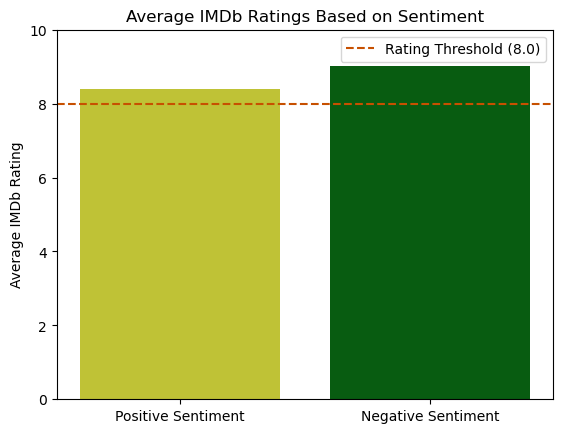

Average IMDb Rating for Positive Episodes: 8.40
Average IMDb Rating for Negative Episodes: 9.02


In [351]:
# Create boolean masks for positive and negative sentiment
positive_mask = df['Sentiment_Compound'] > 0.5
negative_mask = df['Sentiment_Compound'] < -0.5

# Calculate average IMDb ratings
average_positive_rating = df[positive_mask]['Rating_IMDB'].mean()
average_negative_rating = df[negative_mask]['Rating_IMDB'].mean()

# Create a bar chart to visualize the average ratings
categories = ['Positive Sentiment', 'Negative Sentiment']
average_ratings = [average_positive_rating, average_negative_rating]

plt.bar(categories, average_ratings, color=['#bfc236', '#085c11'])
plt.ylabel('Average IMDb Rating')
plt.title('Average IMDb Ratings Based on Sentiment')
plt.ylim(0, 10)  
plt.axhline(8, color='#c75000', linestyle='--', label='Rating Threshold (8.0)')
plt.legend()
plt.show()


print(f"Average IMDb Rating for Positive Episodes: {average_positive_rating:.2f}")
print(f"Average IMDb Rating for Negative Episodes: {average_negative_rating:.2f}")


**Insights**  
The analysis suggests that episodes with a negative sentiment score have a higher average IMDb rating (**9.02**) compared to those with a positive sentiment score (**8.40**), which might indicate that viewers find dramatic or intense storylines—often characterized by negative sentiments—more compelling or engaging than those that are more positive.  

**Potential Reasons**
- **Complex Narratives**: Episodes that evoke negative sentiments may contain deeper, more complex narratives that resonate well with the audience, leading to higher ratings.
- **Emotional Impact**: Negative or dramatic episodes might create a stronger emotional response, prompting viewers to rate them more favorably.
- **Character Development**: Episodes featuring conflicts or challenges often provide significant character development, which may enhance viewer satisfaction.

## Overall Basic Analysis

This section summarizes key statistics for the "Breaking Bad" series, including the total number of episodes and seasons, air dates, and average IMDb ratings.  
It identifies the best and worst episodes based on ratings, provides details about them, and visualizes the IMDb ratings trend with a line chart. Additionally, it presents the average episode duration by season in a bar chart.


          Breaking Bad Overall analysis           
The First episode aired on - 20-Jan-08
The Last episode aired on - 29-Sep-13
Number of Seasons - 5
Number of Episodes - 62

Average Duration by Season:
Season
1    49.428571
2    47.000000
3    47.000000
4    48.230769
5    48.500000
Name: Duration_mins, dtype: float64


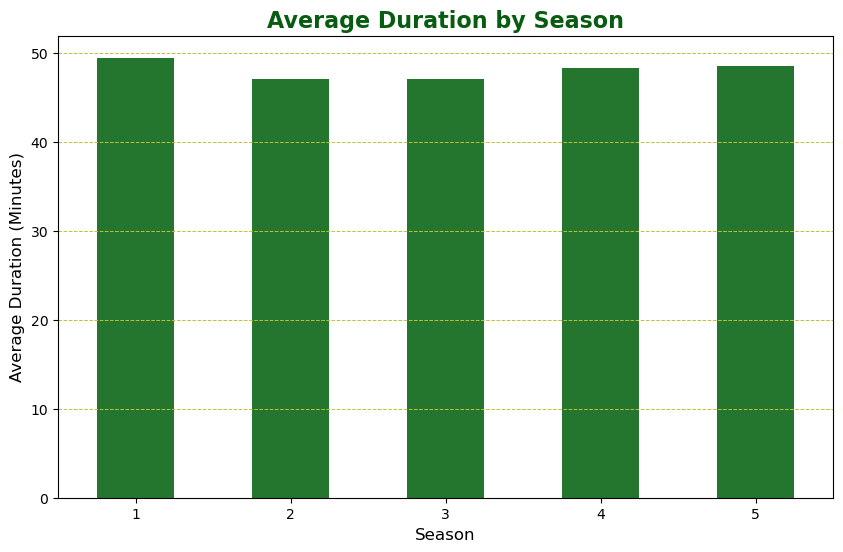


Overall Mean IMDb Rating for Breaking Bad: 9.02


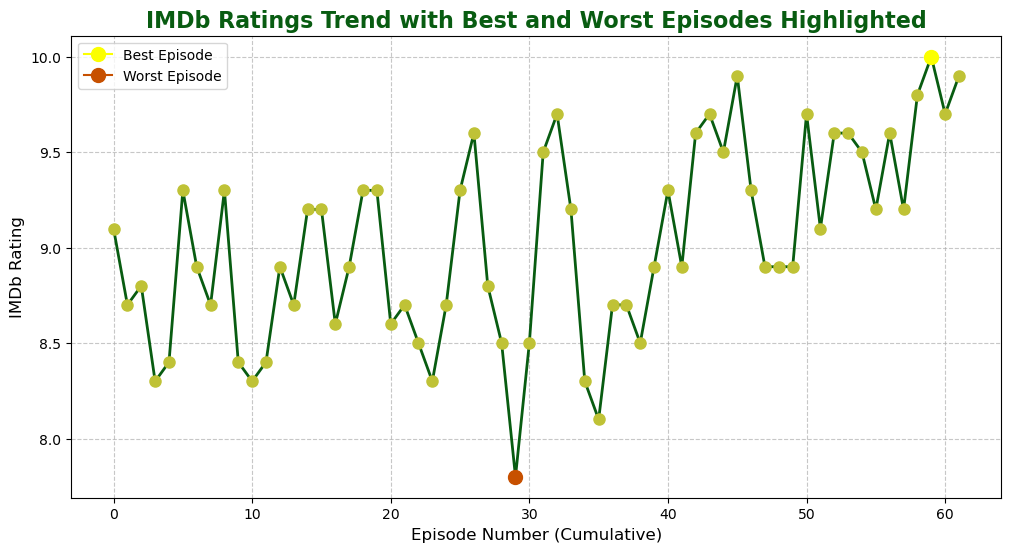

--------------------------------------------------
Best Rating Episode of all series 
--------------------------------------------------
Title: 'Ozymandias'
Season 5 Episode 14
IMDB Rating 10.0
Directed by Rian Johnson
Summary: Walt goes on the run. Jesse is taken hostage. Marie convinces Skyler to tell Walter, Jr. the truth.
------------------------------------------------------------------------------------------------------------------------------
Worst Rating Episode of all series
--------------------------------------------------
Title: 'Fly'
Season 3 Episode 10
IMDB Rating 7.8
Directed by Rian Johnson
Summary: There is a fly loose in the lab. Walt and Jesse must do whatever they can to kill it before it contaminates the meth.
------------------------------------------------------------------------------------------------------------------------------


In [354]:
number_of_episodes=len(df)
distinct_seasons = df['Season'].unique()
number_of_seasons=len(distinct_seasons)

first_air_date = df['Date'].iloc[0]
last_air_date = df['Date'].iloc[61]

best_episode = df.loc[df['Rating_IMDB'].idxmax()]
worst_episode = df.loc[df['Rating_IMDB'].idxmin()]

    
def best_and_worst_chart():
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Rating_IMDB'], marker='o', linestyle='-', color='#085c11',
             markersize=8, linewidth=2, markerfacecolor='#bfc236', markeredgecolor='#bfc236')
    
    plt.plot(best_episode.name, best_episode['Rating_IMDB'], marker='o', markersize=10, color='#fbff00', label="Best Episode")
    plt.plot(worst_episode.name, worst_episode['Rating_IMDB'], marker='o', markersize=10, color='#c75000', label="Worst Episode")
    
    plt.title('IMDb Ratings Trend with Best and Worst Episodes Highlighted', fontsize=16, fontweight='bold', color='#085c11')
    plt.xlabel('Episode Number (Cumulative)', fontsize=12)
    plt.ylabel('IMDb Rating', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

def best_and_worst():
    print("-" * 50)
    print(f"Best Rating Episode of all series ")
    print("-" * 50)

    print(f"Title: '{best_episode['Title']}'")
    print(f"Season {best_episode['Season']} Episode {best_episode['Episode']}")
    print(f"IMDB Rating {best_episode['Rating_IMDB']:.1f}")
    print(f"Directed by {best_episode['Directed by']}")

    print(f"Summary: {best_episode['Summary']}")
    print("-" * 126)
    
    print(f"Worst Rating Episode of all series")
    print("-" * 50)

    print(f"Title: '{worst_episode['Title']}'")
    print(f"Season {worst_episode['Season']} Episode {worst_episode['Episode']}")
    print(f"IMDB Rating {worst_episode['Rating_IMDB']:.1f}")
    print(f"Directed by {worst_episode['Directed by']}")

    print(f"Summary: {worst_episode['Summary']}")
    
    print("-" * 126)




def overall_analysis():
    print("=" * 50)
    print(f"{f'Breaking Bad Overall analysis':^50}")
    print("=" * 50)

    print(f"The First episode aired on - {first_air_date}")
    print(f"The Last episode aired on - {last_air_date}")
    print(f"Number of Seasons - {number_of_seasons}")
    print(f"Number of Episodes - {number_of_episodes}")
    minutes_chart()

    overall_mean_rating = df['Rating_IMDB'].mean()
    print(f"\nOverall Mean IMDb Rating for Breaking Bad: {overall_mean_rating:.2f}")
    best_and_worst_chart()
    best_and_worst()

def minutes_chart():
    avg_duration_by_season = df.groupby('Season')['Duration_mins'].mean()
    print(f"\nAverage Duration by Season:\n{avg_duration_by_season}")

    plt.figure(figsize=(10, 6))
    avg_duration_by_season.plot(kind='bar', color='#24752d')
    plt.title('Average Duration by Season', fontsize=16,fontweight='bold',color='#085c11')
    plt.xlabel('Season', fontsize=12)
    plt.ylabel('Average Duration (Minutes)', fontsize=12)
    plt.xticks(rotation=0)
    plt.grid(axis='y',linestyle='--', linewidth=0.7, color='#bfc236')
    plt.show()
overall_analysis()

## Functions for Breaking Bad Seasons Basic Analysis
*Detailed functions to analyze each season individually, providing insights and visualizations for a deeper understanding of the show's ratings.*

In [356]:
def analyze_season(season_num):
    number_of_episodes=len(season_num)
    season=season_num['Season'].iloc[0]
    best_episode = season_num.loc[season_num['Rating_IMDB'].idxmax()]
    worst_episode = season_num.loc[season_num['Rating_IMDB'].idxmin()]
    
    # Print with formatting
    print("=" * 50)
    print(f"{f'Breaking Bad Season {season} Analysis':^50}")
    print("=" * 50)
    print(f"Number of episodes: {number_of_episodes}")
    print("-" * 50)
    
    print(f"Best Rating Episode")
    print(f"Title: '{best_episode['Title']}'")
    print(f"Episode {best_episode['Episode']} with Rating of {best_episode['Rating_IMDB']:.1f}")
    print(f"Summary: {best_episode['Summary']}")
    print("-" * 50)
    
    print(f"Worst Rating Episode")
    print(f"Title: '{worst_episode['Title']}'")
    print(f"Episode {worst_episode['Episode']} with Rating of {worst_episode['Rating_IMDB']:.1f}")
    print(f"Summary: {worst_episode['Summary']}")

def show_chart(season_num):
    line_color="#085c11"
    marker_color="#bfc236"
    season=season_num['Season'].iloc[0]

    
    # Create a line plot
    plt.figure(figsize=(10, 5))
    plt.plot(season_num['Episode'], season_num['Rating_IMDB'],
             marker='o', linestyle='-', color=line_color,
             markersize=8, linewidth=2, markerfacecolor=marker_color,
            markeredgecolor= marker_color)
    plt.title(f'IMDb Ratings for Each Episode of Breaking Bad Season {season}',
             fontsize=15, fontweight='bold', color=line_color)
    plt.xlabel('Episode Number', fontsize=12)
    plt.ylabel('IMDb Rating', fontsize=12)
    plt.xticks(season_num['Episode'])
    plt.grid(color="#dcde78", linestyle='--', linewidth=1)
    plt.gca()
    plt.show()

def rating_mean(season_num):
    season=season_num['Season'].iloc[0]
    mean_1 = season_num['Rating_IMDB'].mean()
    print(f"The mean of the IMDb ratings for season {season} of Breaking Bad is {mean_1:.2f}")

### Season 1 of Breaking Bad

          Breaking Bad Season 1 Analysis          
Number of episodes: 7
--------------------------------------------------
Best Rating Episode
Title: 'Crazy Handful of Nothin''
Episode 6 with Rating of 9.3
Summary: With the side effects and cost of his treatment mounting, Walt demands that Jesse finds a wholesaler to buy their drugs - which lands him in trouble.
--------------------------------------------------
Worst Rating Episode
Title: 'Cancer Man'
Episode 4 with Rating of 8.3
Summary: Walt tells the rest of his family about his cancer. Jesse tries to make amends with his own parents.


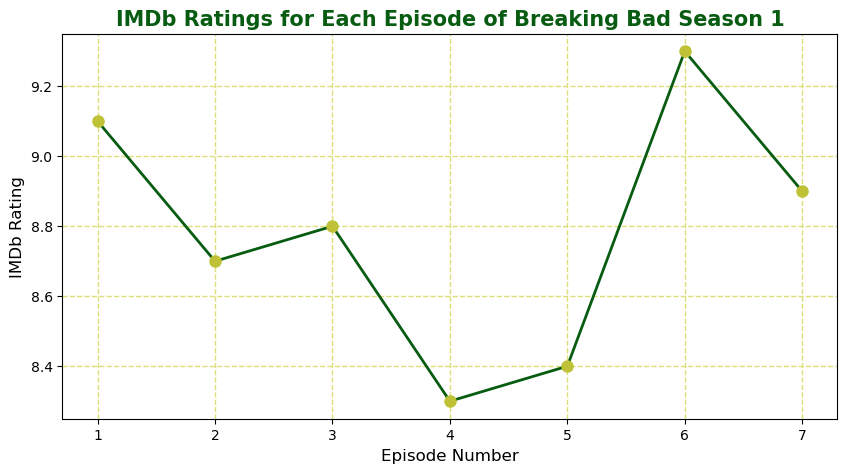

The mean of the IMDb ratings for season 1 of Breaking Bad is 8.79


In [358]:
season=df[df['Season']==1]
analyze_season(season)
show_chart(season)
rating_mean(season)

### Season 2 of Breaking Bad

          Breaking Bad Season 2 Analysis          
Number of episodes: 13
--------------------------------------------------
Best Rating Episode
Title: 'Grilled'
Episode 2 with Rating of 9.3
Summary: Walt's disappearance is met with investigation by both his wife and Hank, as Tuco Salamanca intends to leave town with his kidnapped cooks.
--------------------------------------------------
Worst Rating Episode
Title: 'Down'
Episode 4 with Rating of 8.3
Summary: Skyler keeps mysteriously leaving without talking to Walt. Jesse's parents throw him out of his own house.


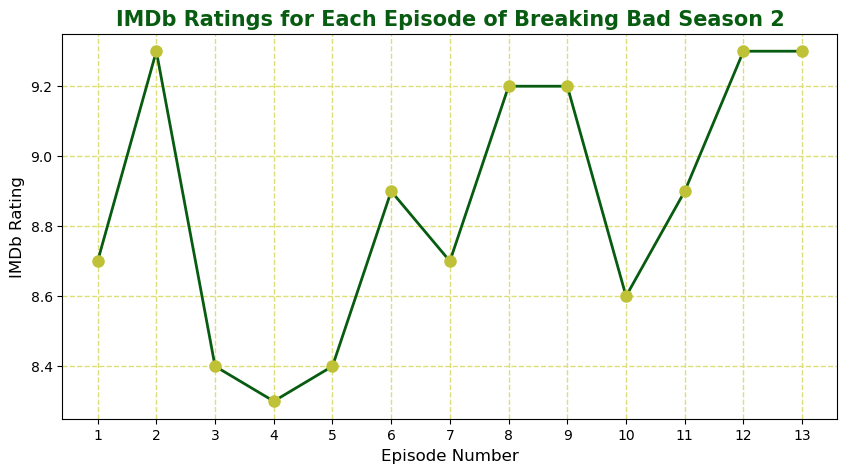

The mean of the IMDb ratings for season 2 of Breaking Bad is 8.86


In [360]:
season=df[df['Season']==2]
analyze_season(season)
show_chart(season)
rating_mean(season)

### Season 3 of Breaking Bad


          Breaking Bad Season 3 Analysis          
Number of episodes: 13
--------------------------------------------------
Best Rating Episode
Title: 'Full Measure'
Episode 13 with Rating of 9.7
Summary: Jesse has disappeared and Walt is in big trouble with Gus. So Gus rehires Gale to learn from Walt's cooking so that they can dispose of Walt once and for all.
--------------------------------------------------
Worst Rating Episode
Title: 'Fly'
Episode 10 with Rating of 7.8
Summary: There is a fly loose in the lab. Walt and Jesse must do whatever they can to kill it before it contaminates the meth.


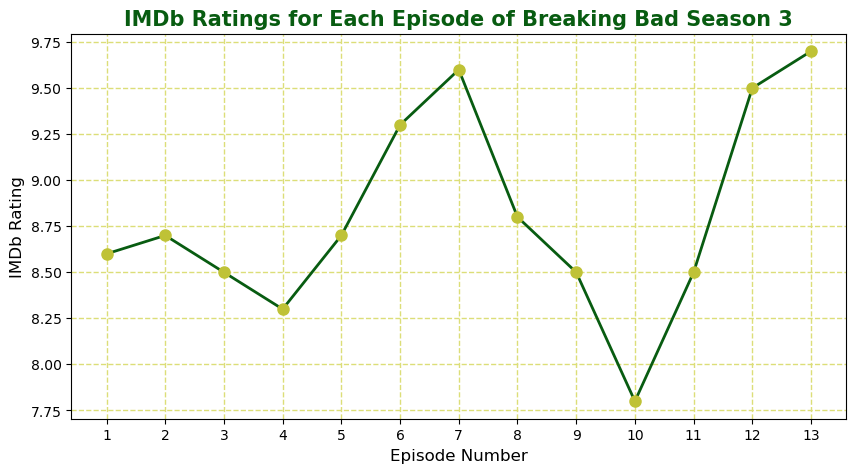

The mean of the IMDb ratings for season 3 of Breaking Bad is 8.81


In [362]:
season=df[df['Season']==3]
analyze_season(season)
show_chart(season)
rating_mean(season)

### Season 4 of Breaking Bad

          Breaking Bad Season 4 Analysis          
Number of episodes: 13
--------------------------------------------------
Best Rating Episode
Title: 'Face Off'
Episode 13 with Rating of 9.9
Summary: Jesse is brought to the FBI for questioning on his knowledge of ricin. In a last effort to kill Gus, Walt must ask for help from an old enemy.
--------------------------------------------------
Worst Rating Episode
Title: 'Open House'
Episode 3 with Rating of 8.1
Summary: While Walt worries about Gus's interference and Jesse's increasingly fragile state of mind, Skyler steps up the pressure to get what she wants.


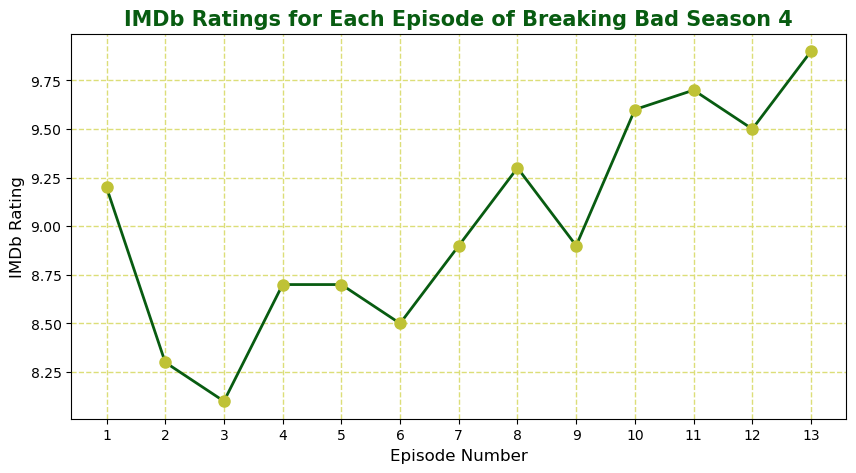

The mean of the IMDb ratings for season 4 of Breaking Bad is 9.02


In [364]:
season=df[df['Season']==4]
analyze_season(season)
show_chart(season)
rating_mean(season)

### Season 5 of Breaking Bad

          Breaking Bad Season 5 Analysis          
Number of episodes: 16
--------------------------------------------------
Best Rating Episode
Title: 'Ozymandias'
Episode 14 with Rating of 10.0
Summary: Walt goes on the run. Jesse is taken hostage. Marie convinces Skyler to tell Walter, Jr. the truth.
--------------------------------------------------
Worst Rating Episode
Title: 'Madrigal'
Episode 2 with Rating of 8.9
Summary: Walt and Jesse seek out an unlikely partner for a new business venture. The DEA follows up new leads in its investigation.


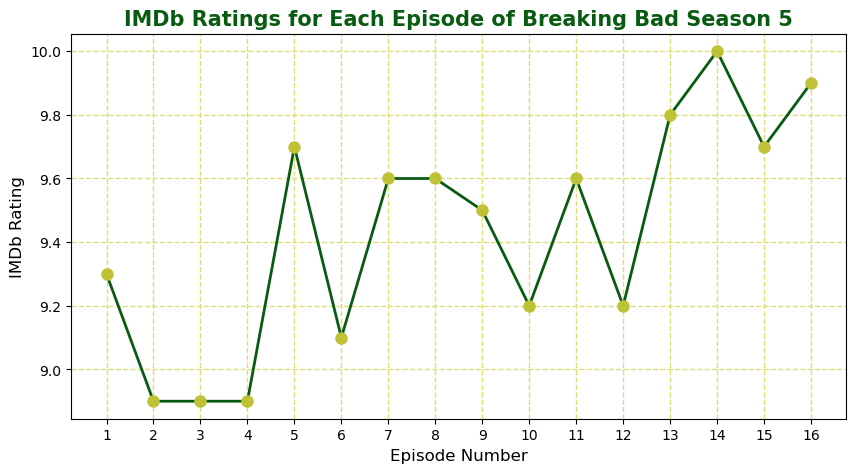

The mean of the IMDb ratings for season 5 of Breaking Bad is 9.43


In [366]:
season=df[df['Season']==5]
analyze_season(season)
show_chart(season)
rating_mean(season)

## Conclusion

To sum up everything, this analysis of Breaking Bad reveals that episodes with strong emotions, whether positive or negative, tend to receive higher IMDb ratings. We identified the best and worst episodes and examined their ratings.Overall, Breaking Bad, as an iconic series, has a high average IMDb rating, showing its popularity among viewers. The insights gained from this project highlight how the show's themes and emotional depth resonate with its audience.